In [2]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [5]:
(train_data , train_targets), (test_data, test_targets) = boston_housing.load_data()
print (train_data.shape)
print (train_targets.shape)
print (test_data.shape)
print (test_targets.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [8]:
train_data = (train_data - train_data.mean(axis=0)) / train_data.std(axis=0)
test_data = (test_data - test_data.mean(axis=0)) / test_data.std(axis=0)


In [9]:
model = Sequential()
model.add(Dense(1,input_shape = (train_data.shape[1],)))
model.compile(optimizer='rmsprop', loss='mse', metrics =['mae'])

In [10]:
history = model.fit(train_data,train_targets, epochs = 100, batch_size = 1, validation_split = 0.2, verbose = True)

Epoch 1/100
323/323 [==============================] - 2s 3ms/step - loss: 553.7719 - mae: 21.9421 - val_loss: 615.9769 - val_mae: 23.2724
Epoch 2/100
323/323 [==============================] - 1s 2ms/step - loss: 536.8577 - mae: 21.6416 - val_loss: 598.3226 - val_mae: 22.9422
Epoch 3/100
323/323 [==============================] - 1s 2ms/step - loss: 521.3359 - mae: 21.3604 - val_loss: 581.8279 - val_mae: 22.6192
Epoch 4/100
323/323 [==============================] - 1s 2ms/step - loss: 506.2147 - mae: 21.0566 - val_loss: 565.4100 - val_mae: 22.2911
Epoch 5/100
323/323 [==============================] - 1s 2ms/step - loss: 491.2681 - mae: 20.7710 - val_loss: 549.8147 - val_mae: 21.9682
Epoch 6/100
323/323 [==============================] - 1s 2ms/step - loss: 477.1931 - mae: 20.4659 - val_loss: 534.9279 - val_mae: 21.6486
Epoch 7/100
323/323 [==============================] - 1s 2ms/step - loss: 463.5530 - mae: 20.1710 - val_loss: 520.6602 - val_mae: 21.3296
Epoch 8/100
323/323 [======

In [11]:
predictions = model.predict(test_data)

4/4 [==============================] - 0s 3ms/step


In [15]:
mse = mean_squared_error(test_targets,predictions)
print("Mean squared Error :", mse)

mae = mean_absolute_error(test_targets,predictions)
print("Mean squared Error :", mae)

r2 = r2_score(test_targets,predictions)
print("Mean squared Error :", r2)

Mean squared Error : 25.547484758274702
Mean squared Error : 3.719967995437921
Mean squared Error : 0.6931006289047524


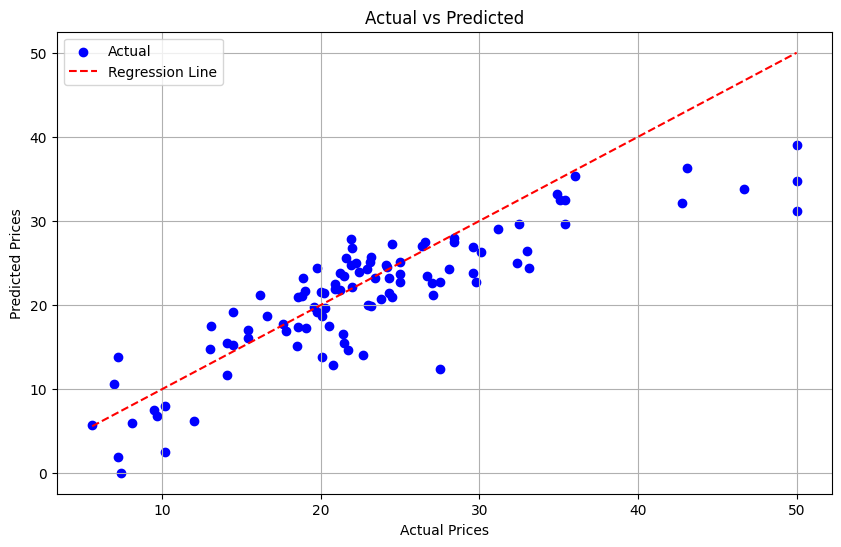

In [18]:
import numpy as np

# Plotting the actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(test_targets, predictions, color='blue', label='Actual')
plt.plot([min(test_targets), max(test_targets)], [min(test_targets), max(test_targets)], color='red', linestyle='--', label='Regression Line')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()